Running experiment for Linear Search...


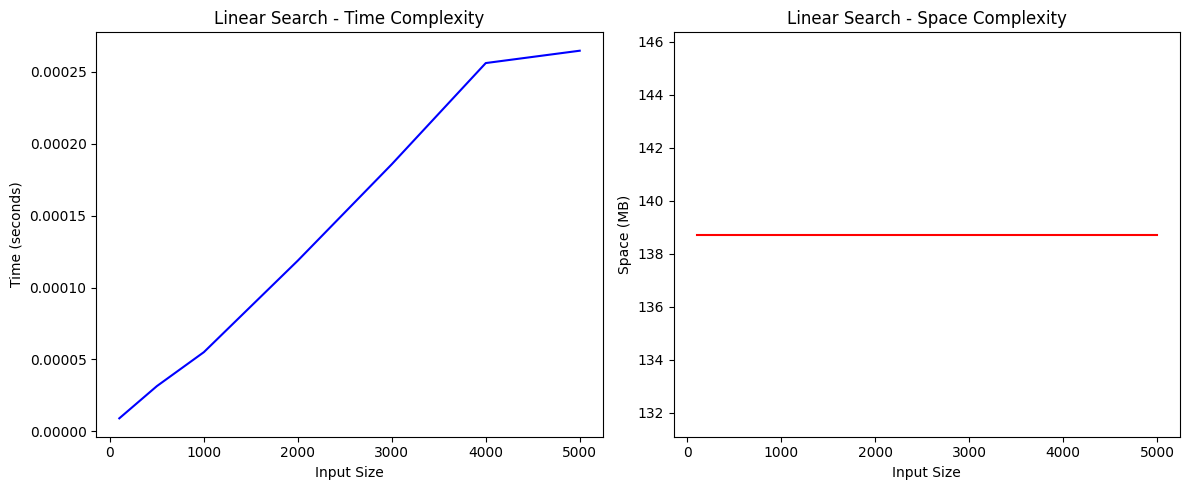

Running experiment for Binary Search...


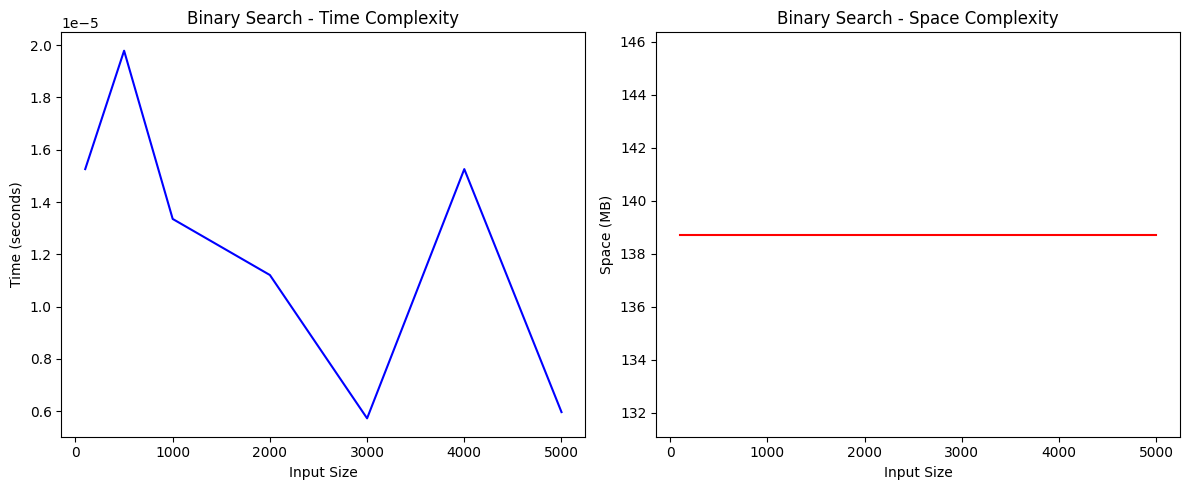

Running experiment for Bubble Sort...


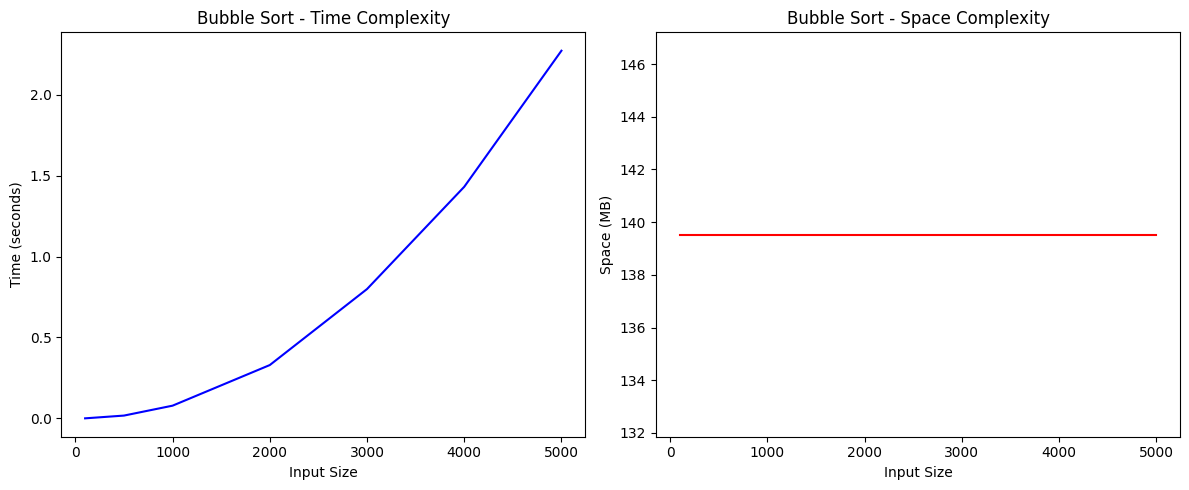

Running experiment for Merge Sort...


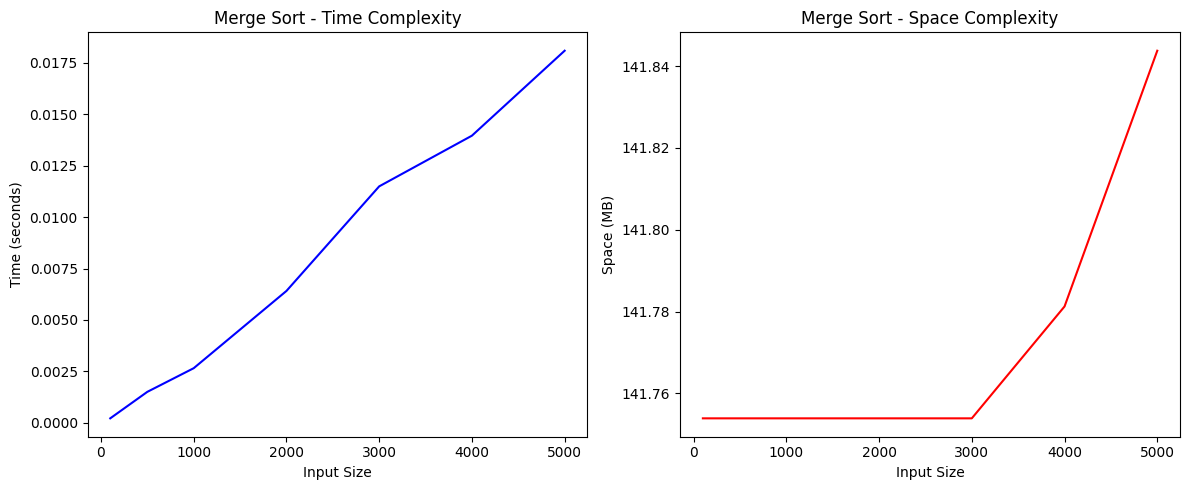

Running experiment for Quick Sort...


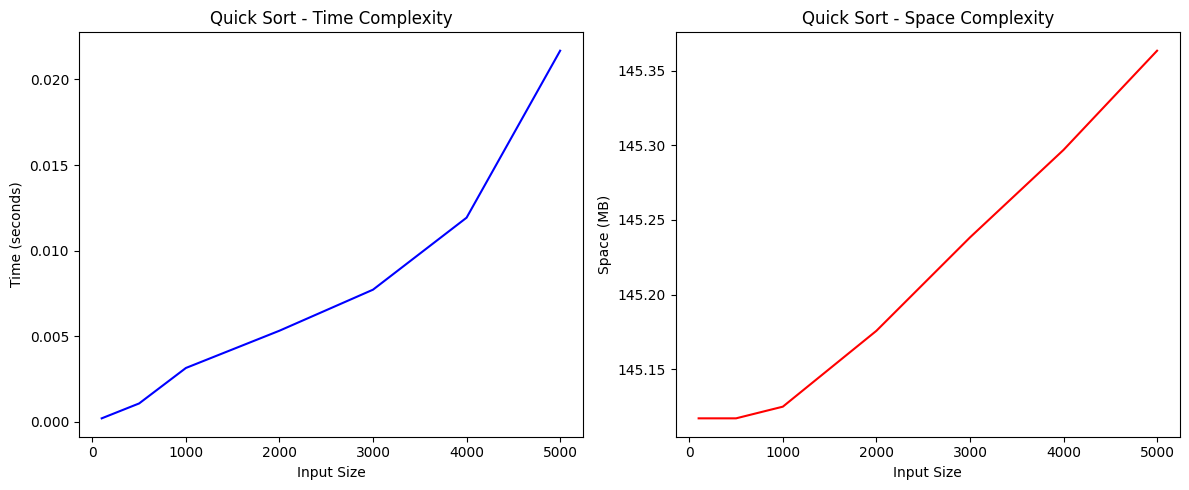

All experiments completed. Check the generated plots.


In [9]:
import time
import matplotlib.pyplot as plt
import numpy as np
from memory_profiler import memory_usage

def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return -1

def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i, j = 0, 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

def measure_time(func, *args):
    start_time = time.time()
    func(*args)
    return time.time() - start_time

def measure_space(func, *args):
    return max(memory_usage((func, args)))

def plot_complexity(sizes, times, space, algorithm_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.plot(sizes, times, 'b-')
    ax1.set_xlabel('Input Size')
    ax1.set_ylabel('Time (seconds)')
    ax1.set_title(f'{algorithm_name} - Time Complexity')
    
    ax2.plot(sizes, space, 'r-')
    ax2.set_xlabel('Input Size')
    ax2.set_ylabel('Space (MB)')
    ax2.set_title(f'{algorithm_name} - Space Complexity')
    
    plt.tight_layout()
    plt.show()

def run_experiment(algorithm, sizes, is_search=False):
    times = []
    space = []
    for size in sizes:
        arr = list(range(size))
        np.random.shuffle(arr)
        
        if is_search:
            target = size + 1  # Ensure worst-case scenario for search
            # Measure time
            time_taken = measure_time(algorithm, arr, target)
            times.append(time_taken)
            
            # Measure space
            space_taken = measure_space(algorithm, arr, target)
            space.append(space_taken)
        else:
            # Measure time
            time_taken = measure_time(algorithm, arr.copy())
            times.append(time_taken)
            
            # Measure space
            space_taken = measure_space(algorithm, arr.copy())
            space.append(space_taken)
    
    return times, space

# Run experiments
sizes = [100, 500, 1000, 2000, 3000, 4000, 5000]
algorithms = [
    (linear_search, "Linear Search", True),
    (binary_search, "Binary Search", True),
    (bubble_sort, "Bubble Sort", False),
    (merge_sort, "Merge Sort", False),
    (quick_sort, "Quick Sort", False)
]

for algorithm, name, is_search in algorithms:
    print(f"Running experiment for {name}...")
    times, space = run_experiment(algorithm, sizes, is_search)
    plot_complexity(sizes, times, space, name)

print("All experiments completed. Check the generated plots.")